In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data=pd.read_csv("Datasets/final_feature_extracted.csv")
data=pd.read_csv("sample.csv")


In [3]:
data.columns

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix_Suffix',
       'DNS_Record', 'Domain_Age', 'End_Domain', 'iFrame', 'Web_Forwards',
       'label'],
      dtype='object')

In [4]:
# checking the balence of data
s1=0
s0=0
for i in data["label"]:
    if i==1:
        s1=s1+1
    else:
        s0=s0+1
print(s1," ",s0)

2500   2500


In [5]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Web_Forwards,label
0,0,1,3,0,0,0,0,1,0,0,0
1,0,1,5,0,0,0,1,1,0,1,0
2,0,0,0,1,0,1,1,1,0,0,1
3,0,1,4,0,0,0,0,1,0,0,0
4,0,1,7,0,0,0,0,1,0,0,1


<hr>

In [6]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((5000, 10), (5000,))

In [8]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_train.shape, X_test.shape

((4000, 10), (1000, 10))

In [9]:
# checking the balence of data
s1=0
s0=0
for i in y_train:
    if i==1:
        s1=s1+1
    else:
        s0=s0+1
print(s1," ",s0)

2007   1993


<hr>

* Random Forest
* XGBoost
* Gradient Boost 
* Multi-layer Perceptron

In [10]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [11]:
ML_Model = []
accuracy = []
recall = []
precision = []
f1 = []

#function to call for storing the results
def storeResults(model, acc,rec,preci,f):
  ML_Model.append(model)
  accuracy.append(round(acc, 3))
  recall.append(round(rec, 3))
  precision.append(round(preci, 3))
  f1.append(round(f, 3))
    

<hr>

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

    n_estimators  accuracy
15            19     0.852
19            23     0.852
20            24     0.853
13            17     0.853
8             12     0.853
34            38     0.854
11            15     0.854
10            14     0.854
26            30     0.854
31            35     0.854
2              5     0.854
30            34     0.855
21            25     0.855
7             11     0.855
5              8     0.856
24            28     0.856
22            26     0.856
0              3     0.856
25            29     0.857
16            20     0.857
33            37     0.858
17            21     0.858
35            39     0.858
27            31     0.859
29            33     0.859
3              6     0.859
18            22     0.859
23            27     0.860
9             13     0.860
6              9     0.861
28            32     0.861
32            36     0.861
1              4     0.861
14            18     0.862
12            16     0.862
4              7     0.862


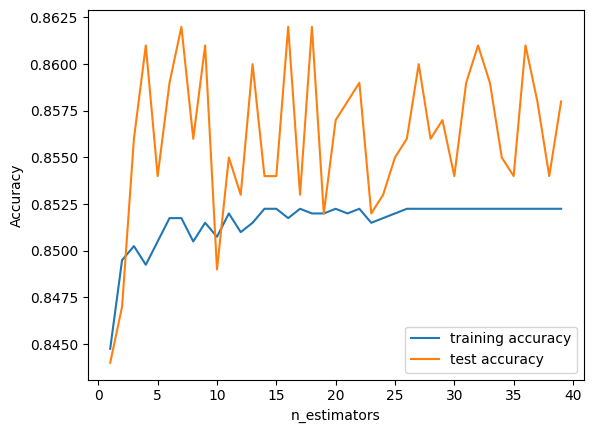

In [13]:
training_accuracy = []
test_accuracy = []
n_esti=[]
accuracy_rf=[]
max=0
depth = range(1,40)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    if forest_test.score(X_test, y_test)>=0.85:
        n_esti.append(n)
        accuracy_rf.append(forest_test.score(X_test, y_test))
        max=forest_test.score(X_test, y_test)

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

df=pd.DataFrame({"n_estimators":n_esti, "accuracy":accuracy_rf})
df=df.sort_values("accuracy")
print(df)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
forest = RandomForestClassifier()
param_grid = {'n_estimators': [32,7,16,18,4,36],
'max_depth': [10,12,13,14],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True]
}

forest_random = RandomizedSearchCV(estimator = forest, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [15]:
forest_random.fit(X_train, y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 12, 13, 14],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [32, 7, 16, 18, 4, 36]},
                   random_state=42, verbose=2)

In [16]:
forest_random.best_params_

{'n_estimators': 7, 'max_features': 'auto', 'max_depth': 13, 'bootstrap': True}

In [17]:
forest_pred= forest_random.predict(X_test)

In [18]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       507
           1       0.94      0.77      0.84       493

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [19]:

storeResults('Random Forest',
accuracy_score(y_test,forest_pred),
recall_score(y_test,forest_pred),
precision_score(y_test,forest_pred),
f1_score(y_test,forest_pred))

<hr>

#### XGBoost 

In [20]:
from xgboost import XGBClassifier

In [21]:
# xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb = XGBClassifier(learning_rate=0.7,max_depth=12)

In [22]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
xgb_pred = xgb.predict(X_test)


In [24]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       507
           1       0.94      0.76      0.84       493

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [25]:

storeResults('XGBoost',
accuracy_score(y_test,xgb_pred),
recall_score(y_test,xgb_pred),
precision_score(y_test,xgb_pred),
f1_score(y_test,xgb_pred))

<hr>

#### Gradient Boost

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

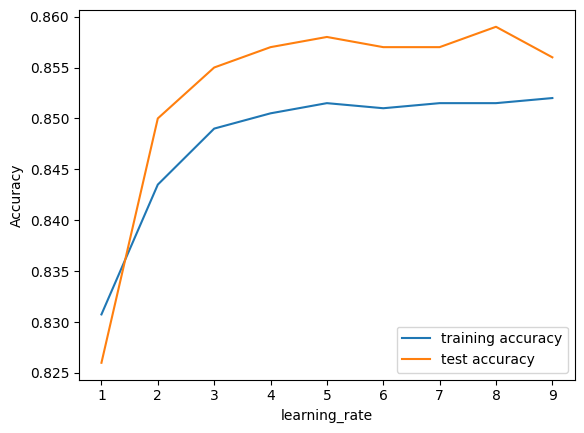

In [27]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

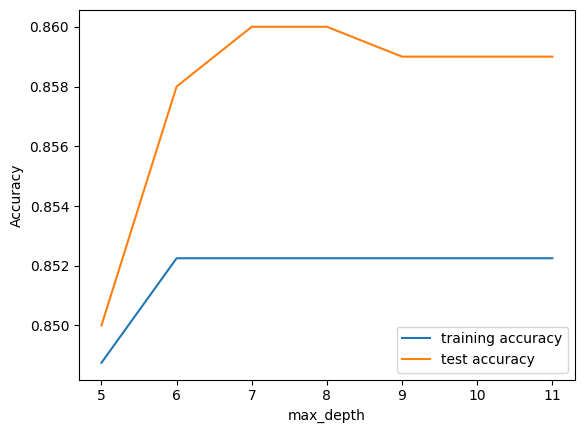

In [28]:
training_accuracy = []
test_accuracy = []
depth = range(5,12,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
gbc = XGBClassifier()
param_grid = {'learning_rate':[0.3,0.4,0.5,0.8],
'max_depth':[7,8,9,10,11]
}

gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, scoring='roc_auc',n_jobs=10,cv=10)

In [30]:
gbc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.5, 0.8],
                                        'max_depth': [7, 8, 9, 10, 11]},
                   scoring='roc_auc')

In [31]:
gbc_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
gbc_pred = gbc_random.predict(X_test)

In [33]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       507
           1       0.94      0.76      0.84       493

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [34]:

storeResults('Gradient Boost',
accuracy_score(y_test,gbc_pred),
recall_score(y_test,gbc_pred),
precision_score(y_test,gbc_pred),
f1_score(y_test,gbc_pred))

<hr>

#### Multilayer Perceptron

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(80,),(50,),(20,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid,n_jobs=-1,cv=5)

In [37]:
mlp_random.fit(X_train,y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001, 0.05],
                                        'hidden_layer_sizes': [(80,), (50,),
                                                               (20,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam']})

In [38]:
mlp_pred = mlp_random.predict(X_test)

In [39]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       507
           1       0.95      0.68      0.80       493

    accuracy                           0.83      1000
   macro avg       0.86      0.83      0.82      1000
weighted avg       0.86      0.83      0.82      1000



In [40]:

storeResults('Multi-Layer Perceptron',
accuracy_score(y_test,mlp_pred),
recall_score(y_test,mlp_pred),
precision_score(y_test,mlp_pred),
f1_score(y_test,mlp_pred))

<hr>

#### Comparision

In [41]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Recall'   : recall,
                        'Precision': precision,
                        'f1_score' : f1
                      })

In [42]:
# dispalying total result
result

,ML Model,Accuracy,Recall,Precision,f1_score
0,Random Forest,0.861,0.767,0.940,0.845
1,XGBoost,0.859,0.763,0.940,0.842
2,Gradient Boost,0.857,0.759,0.940,0.840
3,Multi-Layer Perceptron,0.828,0.684,0.955,0.797


In [43]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['f1_score', 'Recall','Accuracy'],ascending=False).reset_index(drop=True)

In [44]:
# dispalying total result
sorted_result

,ML Model,Accuracy,Recall,Precision,f1_score
0,Random Forest,0.861,0.767,0.940,0.845
1,XGBoost,0.859,0.763,0.940,0.842
2,Gradient Boost,0.857,0.759,0.940,0.840
3,Multi-Layer Perceptron,0.828,0.684,0.955,0.797


<hr>

#### Storing the best Model


In [45]:
import pickle

# dump information to that file
pickle.dump(forest_random, open('model.pkl', 'wb'))